In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
vif_inf = ["건설수주_건축(단위 백만원)", "건설수주_주택(단위 백만원)", "소비자물가지수 주택, 수도, 전기 및 연료",
            "S&P 500_change_rate", "NASDAQ_close" , "NASDAQ_change_rate", "DOW Jones_change_rate", "KRX300_change_rate", "KOSPI_change_rate"]

##vif를 통해서 제거해야할 열들을 추출함!

#VIF를 통해서 데이터 삭제해야할 것을 알았으니, 원본 데이터를 새로 부른다음에 X,y로 나눈 다음에 진행해보기!

In [ ]:
#data새로 불러오기 (X,y 나누기)
data = pd.read_csv("/content/drive/MyDrive/DAT학회/부동산-프로젝트/Raemian_final.csv")

In [ ]:
data = data.drop(columns = vif_inf)
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [ ]:
data

계약년월  건축년도 매칭 구  매매가격지수(아파트) 경상수지(백만불) 무역수지(백만불) 대출금액(아파트)(억원)  \
0     202101  2020  강남구         97.0     5,762     3,550     25,979.03   
1     202105  2020  강남구         99.0    11,307     2,814     21,924.71   
2     202105  2020  강남구         99.0    11,307     2,814     21,924.71   
3     202105  2020  강남구         99.0    11,307     2,814     21,924.71   
4     202105  2020  강남구         99.0    11,307     2,814     21,924.71   
...      ...   ...  ...          ...       ...       ...           ...   
7857  202011  2011   중구         96.4     9,619     5,807     26,045.45   
7858  202012  2011   중구         96.6    12,063     6,694     34,654.82   
7859  202012  2011   중구         96.6    12,063     6,694     34,654.82   
7860  202012  2011   중구         96.6    12,063     6,694     34,654.82   
7861  202012  2011   중구         96.6    12,063     6,694     34,654.82   

     대출잔액(아파트)(억원) 서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  ...  \
0        22,748.79                234               5945  ...   
1        19,920.09                360               5090  ...   
2        19,920.09                360               5090  ...   
3        19,920.09                360               5090  ...   
4        19,920.09                360               5090  ...   
...            ...                ...                ...  ...   
7857     22,428.73                 99               4725  ...   
7858     29,943.84              1,178               8764  ...   
7859     29,943.84              1,178               8764  ...   
7860     29,943.84              1,178               8764  ...   
7861     29,943.84              1,178               8764  ...   

      소비자물가지수_총지수(가중치:1000?)  원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원  경기종합지수  \
0                     101.04                            1,099.03   103.8   
1                     102.05                            1,123.39   106.3   
2                     102.05                            1,123.39   106.3   
3                     102.05                            1,123.39   106.3   
4                     102.05                            1,123.39   106.3   
...                      ...                                 ...     ...   
7857                  100.09                            1,115.20   102.6   
7858                  100.33                            1,094.50   103.1   
7859                  100.33                            1,094.50   103.1   
7860                  100.33                            1,094.50   103.1   
7861                  100.33                            1,094.50   103.1   

      S&P 500_close  DOW Jones_close  KRX300_close  KOSPI_close  KOSDAQ_close  \
0       3793.748432      30821.35259       1847.35      2976.21        928.73   
1       4167.849536      34270.30859       1932.64      3203.92        981.78   
2       4167.849536      34270.30859       1932.64      3203.92        981.78   
3       4167.849536      34270.30859       1932.64      3203.92        981.78   
4       4167.849536      34270.30859       1932.64      3203.92        981.78   
...             ...              ...           ...          ...           ...   
7857    3548.992480      29124.03662       1593.06      2591.34        886.11   
7858    3695.310014      30148.57990       1794.81      2873.47        968.42   
7859    3695.310014      30148.57990       1794.81      2873.47        968.42   
7860    3695.310014      30148.57990       1794.81      2873.47        968.42   
7861    3695.310014      30148.57990       1794.81      2873.47        968.42   

     KOSDAQ_change_rate           평당가  
0                 -4.10  10848.092020  
1                 -0.17  10951.256930  
2                 -0.17  11919.915870  
3                 -0.17  10951.256930  
4                 -0.17  11919.915870  
...                 ...           ...  
7857              11.79   5754.974222  
7858               9.29   5644.301640  
7859               9.29   5865.646803  
7860               9.29   4979.302424  
7861        

In [ ]:
y = data.iloc[:, 32]

In [ ]:
y #평당가 값 잘 들어감

0       10848.092020
1       10951.256930
2       11919.915870
3       10951.256930
4       11919.915870
            ...     
7857     5754.974222
7858     5644.301640
7859     5865.646803
7860     4979.302424
7861     4921.530364
Name: 평당가, Length: 7755, dtype: float64

In [ ]:
X = data.drop(data.columns[32], axis = 1)
X.shape

(7755, 32)

#object -> float형으로 데이터타입 변

In [ ]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = X['거래금액(만원)']
# CO_architecture = X['건설수주_건축(단위 백만원)']
# CO_dwellinghouse = X['건설수주_주택(단위 백만원)']
current_balance = X['경상수지(백만불)']
trade_balance = X['무역수지(백만불)']
loan_amount = X['대출금액(아파트)(억원)']
loan_balance = X['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = X['서울_신규_분양세대(단위: 세대)']
employed_person = X['경제활동인구_취업자(단위: 천명)']
KOSPI = X['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = X['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# X['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
# CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
# X['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
# CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
# X['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
X['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
X['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
X['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
X['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
X['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
X['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
X['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
X['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7755 entries, 0 to 7861
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7755 non-null   int64  
 1   건축년도                                7755 non-null   int64  
 2   매칭 구                                7755 non-null   object 
 3   매매가격지수(아파트)                         7755 non-null   float64
 4   경상수지(백만불)                           7755 non-null   float64
 5   무역수지(백만불)                           7755 non-null   float64
 6   대출금액(아파트)(억원)                       7755 non-null   float64
 7   대출잔액(아파트)(억원)                       7755 non-null   float64
 8   서울_신규_분양세대(단위: 세대)                  7755 non-null   float64
 9   아파트 동(호)수_(단위: 호)                   7755 non-null   int64  
 10  아파트 건물면적_(천)                        7755 non-null   float64
 11  생산자물가지수 총지수                         7755 no

In [ ]:
X.shape

(7755, 32)

#매칭구 -> one hoe encoding 진행

In [ ]:
ohe = OneHotEncoder(sparse=False)

data_apt_name = ohe.fit_transform(X[['매칭 구']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_apt_name

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
        '중구'], dtype=object)]

In [ ]:
df_apt_name = pd.DataFrame(data_apt_name, columns=[col for col in ohe.categories_[0]])

In [ ]:
df_apt_name

강남구  강동구  강북구  광진구  구로구  노원구  동대문구  동작구  마포구  서대문구  서초구  성동구  성북구  송파구  \
0     1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...  ...  ...   ...  ...  ...  ...  ...   
7750  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
7751  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
7752  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
7753  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
7754  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   

      양천구  영등포구  용산구  은평구   중구  
0     0.0   0.0  0.0  0.0  0.0  
1     0.0   0.0  0.0  0.0  0.0  
2     0.0   0.0  0.0  0.0  0.0  
3     0.0   0.0  0.0  0.0  0.0  
4     0.0   0.0  0.0  0.0  0.0  
...   ...   ...  ...  ...  ...  
7750  0.0   0.0  0.0  0.0  1.0  
7751  0.0   0.0  0.0  0.0  1.0  
7752  0.0   0.0  0.0  0.0  1.0  
7753  0.0   0.0  0.0  0.0  1.0  
7754  0.0   0.0  0.0  0.0  1.0  

[7755 rows x 19 columns]

In [ ]:
X = X.reset_index(drop=True)
df_apt_name = df_apt_name.reset_index(drop=True)
X = pd.concat([X, df_apt_name], axis=1)

In [ ]:
X = X.drop(columns= ["매칭 구"])

In [ ]:
X.isnull().sum()

계약년월                                  0
건축년도                                  0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
아파트 건물면적_(천)                          0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0
경제활동인구_ 실업률(단위: %)                    0
경제활동인구_고용률(단위: %)                     0
경제활동인구_취업자(단위: 천명)                    0
국제 주요국 주가지수(KOSPI)                    0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)          0
예금은행 대출금리(잔액 기준)_총대출(연리%)             0
주택매매가격지수(KB)_서울                       0
소비자물가지수_총지수(가중치:1000?)                0
원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원    0
경기종합지수                                0


In [ ]:
X

계약년월  건축년도  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  \
0     202101  2020         97.0     5762.0     3550.0       25979.03   
1     202105  2020         99.0    11307.0     2814.0       21924.71   
2     202105  2020         99.0    11307.0     2814.0       21924.71   
3     202105  2020         99.0    11307.0     2814.0       21924.71   
4     202105  2020         99.0    11307.0     2814.0       21924.71   
...      ...   ...          ...        ...        ...            ...   
7750  202011  2011         96.4     9619.0     5807.0       26045.45   
7751  202012  2011         96.6    12063.0     6694.0       34654.82   
7752  202012  2011         96.6    12063.0     6694.0       34654.82   
7753  202012  2011         96.6    12063.0     6694.0       34654.82   
7754  202012  2011         96.6    12063.0     6694.0       34654.82   

      대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  ...  \
0          22748.79               234.0               5945      443606.1  ...   
1          19920.09               360.0               5090      378668.0  ...   
2          19920.09               360.0               5090      378668.0  ...   
3          19920.09               360.0               5090      378668.0  ...   
4          19920.09               360.0               5090      378668.0  ...   
...             ...                 ...                ...           ...  ...   
7750       22428.73                99.0               4725      353790.6  ...   
7751       29943.84              1178.0               8764      665470.0  ...   
7752       29943.84              1178.0               8764      665470.0  ...   
7753       29943.84              1178.0               8764      665470.0  ...   
7754       29943.84              1178.0               8764      665470.0  ...   

      서대문구  서초구  성동구  성북구  송파구  양천구  영등포구  용산구  은평구   중구  
0      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  
7750   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  
7751   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  
7752   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  
7753   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  
7754   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  

[7755 rows x 50 columns]

In [ ]:
y.isnull().sum()

0

In [ ]:
print(y.name) #y값이 알맞게 들어간 것을 볼 수 있음

평당가


#X값 정규화 해주기

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std, columns=X.columns) #열 이름 다시 추가

In [ ]:
X_std

계약년월      건축년도  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  \
0     0.813340  1.680987    -0.080759  -0.336701   0.159660       0.246116   
1     0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
2     0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
3     0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
4     0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
...        ...       ...          ...        ...        ...            ...   
7750 -0.643275  0.315383    -0.267459   0.790420   0.997798       0.252797   
7751 -0.627091  0.315383    -0.205226   1.504624   1.327186       1.118777   
7752 -0.627091  0.315383    -0.205226   1.504624   1.327186       1.118777   
7753 -0.627091  0.315383    -0.205226   1.504624   1.327186       1.118777   
7754 -0.627091  0.315383    -0.205226   1.504624   1.327186       1.118777   

      대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  ...  \
0          0.409622           -0.379094          -0.326663     -0.338807  ...   
1          0.021430           -0.338270          -0.537551     -0.544876  ...   
2          0.021430           -0.338270          -0.537551     -0.544876  ...   
3          0.021430           -0.338270          -0.537551     -0.544876  ...   
4          0.021430           -0.338270          -0.537551     -0.544876  ...   
...             ...                 ...                ...           ...  ...   
7750       0.365699           -0.422834          -0.627580     -0.623820  ...   
7751       1.397022           -0.073236           0.368654      0.365238  ...   
7752       1.397022           -0.073236           0.368654      0.365238  ...   
7753       1.397022           -0.073236           0.368654      0.365238  ...   
7754       1.397022           -0.073236           0.368654      0.365238  ...   

          서대문구      서초구       성동구       성북구       송파구       양천구      영등포구  \
0    -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
1    -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
2    -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
3    -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
4    -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
...        ...      ...       ...       ...       ...       ...       ...   
7750 -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
7751 -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
7752 -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
7753 -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   
7754 -0.281926 -0.27683 -0.174043 -0.316967 -0.186622 -0.071095 -0.226992   

           용산구       은평구         중구  
0    -0.071095 -0.069239  -0.093354  
1    -0.071095 -0.069239  -0.093354  
2    -0.071095 -0.069239  -0.093354  
3    -0.071095 -0.069239  -0.093354  
4    -0.071095 -0.069239  -0.093354  
...        ...       ...        ...  
7750 -0.071095 -0.069239  10.711968  
7751 -0.071095 -0.069239  10.711968  
7752 -0.071095 -0.069239  10.711968  
7753 -0.071095 -0.069239  10.711968  
7754 -0.071095 -0.069239  10.711968  

[7755 rows x 50 columns]

In [ ]:
#numpy배열은 head가 없음 슬라이싱으로 확인하기
print(X_std.head())

       계약년월      건축년도  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  \
0  0.813340  1.680987    -0.080759  -0.336701   0.159660       0.246116   
1  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
2  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
3  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
4  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   

   대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  ...  \
0       0.409622           -0.379094          -0.326663     -0.338807  ...   
1       0.021430           -0.338270          -0.537551     -0.544876  ...   
2       0.021430           -0.338270          -0.537551     -0.544876  ...   
3       0.021430           -0.338270          -0.537551     -0.544876  ...   
4       0.021430           -0.338270          -0.537551     -0.544876  ...   

       서대문구      서초구       성동구       성북구       송파구       양천구      영등포구  \
0 -0.2

#scaler은 clustering이 적당함
#회귀분석은 standard로 정규화 해주기

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# #데이터 스케일러
# scaled_data = scaler.fit_transform(X)
# scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# print(scaled_df)

##PCA진행

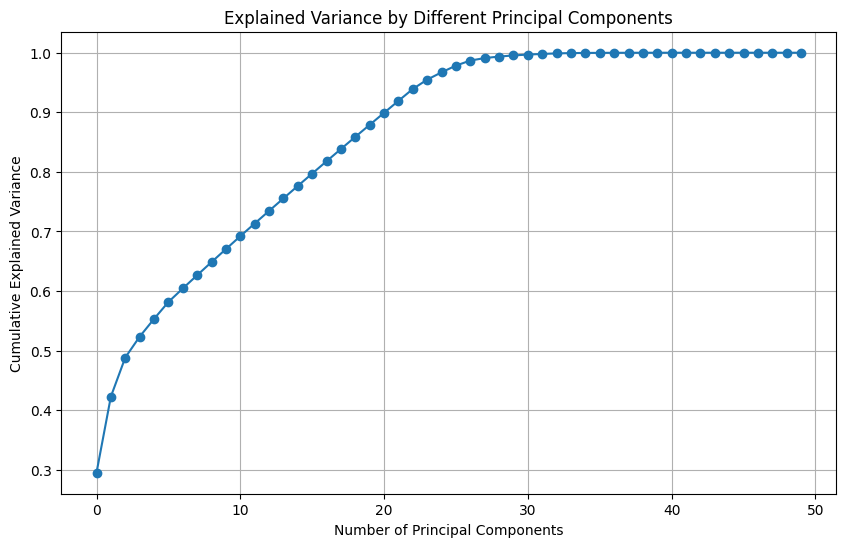

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#pca 모델 생성 (초기에는 모든 주성분 사용)
pca = PCA().fit(X_std)

#누적 설명된 분산 비율 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#누적 설명된 분산을 그래프로 표시
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel("Cumulative Explained Variance")
plt.title('Explained Variance by Different Principal Components')
plt.grid()

'''그래프는 각 주성분의 설명된 분산 비율을 시각적으로 나타냄.
팔꿈치 지점 찾기!
누적분산일 때는 70%, 75%, 80%, 85%, 90%, 95% 일때 찾기
'''

In [ ]:
for i in [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
  target_variance = i
  n_components = np.where(cumulative_variance >= target_variance)[0][0] + 1
  print(f"누적 분산율이 {target_variance*100}%일 때 필요한 주성분의 수: {n_components}")

누적 분산율이 70.0%일 때 필요한 주성분의 수: 12
누적 분산율이 75.0%일 때 필요한 주성분의 수: 14
누적 분산율이 80.0%일 때 필요한 주성분의 수: 17
누적 분산율이 85.0%일 때 필요한 주성분의 수: 19
누적 분산율이 90.0%일 때 필요한 주성분의 수: 22
누적 분산율이 95.0%일 때 필요한 주성분의 수: 24


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 22, random_state = 42)
pca.fit(X)

PCA(n_components=22, random_state=42)

In [ ]:
X_pca = pca.fit_transform(X)

##pca를 진행하지 않고 Random Forest Modle 돌려보기

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


In [ ]:
print(X_pca.shape)
print(y.shape)

(7755, 22)
(7755,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4653, 22) (1551, 22) (1551, 22) (4653,) (1551,) (1551,)


In [ ]:
# PCA 적용된 NumPy 배열을 DataFrame으로 변환
X_train = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
X_val = pd.DataFrame(X_val, columns=[f'PC{i+1}' for i in range(X_val.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])

# 이제 X_train_pca, X_val_pca, X_test_pca를 기존 모델 학습 코드에 사용


In [ ]:
print(X_train)

                PC1            PC2           PC3          PC4          PC5  \
0    -643424.015739  223885.565674 -14115.639948    -8.658275 -1482.607977   
1     -72220.905549 -193457.767014  -3952.672813   111.052584  1528.707461   
2    -643424.015753  223885.565672 -14115.639622    -8.657817 -1482.606993   
3      66005.514140  429608.847006  10003.425455 -5556.596492  1361.942175   
4     354363.782339 -151021.982792 -13050.258523  3562.280087 -1047.993770   
...             ...            ...           ...          ...          ...   
4648  253749.381348  139335.652705  -4587.667392 -5326.653366  6394.105354   
4649  -31611.051441  570200.883781  25692.008200  9020.653701 -1467.710764   
4650  142691.366679 -133175.544039  -2078.468970  -880.550301 -4911.590547   
4651 -643424.015748  223885.565673 -14115.639740    -8.657982 -1482.607358   
4652  191121.390419 -186617.798965  -3689.979065 -4764.283094 -2361.349915   

              PC6          PC7          PC8         PC9        

In [ ]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error

In [ ]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22'],
      dtype='object')

In [ ]:
##training
# 사실 def 함수 만들어서 진행하는 것이 좋긴 함!

# X_train 데이터프레임의 열 이름을 변경하는 코드
X_train.columns = [
    col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
    for col in X_train.columns
]

X_val.columns = [
    col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
    for col in X_val.columns
]

X_test.columns = [
    col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
    for col in X_test.columns
]

# 모델 학습

reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

#2가리로 predict, val_predict하는 것이 좋음 (둘 다 해야지 overfitting인지 아닌지 알 수 있음)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression\t, train = %.4f, val = %.4f" %(mse_train, mse_val))
print("2. Lasso\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))
print("3. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train3, mse_val3))
print("4. XGBoost\t\t, train = %.4f, val = %.4f" %(mse_train4, mse_val4)) #xgb값이 강사님이랑 다름
print("5. LightGBM\t\t, train = %.4f, val = %.4f" %(mse_train5, mse_val5))

#값이 낮아야 좋은것(error 값이니)
#lasso가 안 좋음

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5609
[LightGBM] [Info] Number of data points in the train set: 4653, number of used features: 22
[LightGBM] [Info] Start training from score 5452.823390
1. Linear Regression	, train = 3369011.7615, val = 3414642.8106
2. Lasso		, train = 3369040.4368, val = 3415043.8511
3. Ridge		, train = 3369012.3377, val = 3414772.6945
4. XGBoost		, train = 556843.6370, val = 1574108.6334
5. LightGBM		, train = 932291.7418, val = 1668578.6180


In [ ]:
#prediction
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)


In [ ]:
print("Linear Regression 훈련 세트 예측값:")
print(pred_train)

print("Lasso 훈련 세트 예측값:")
print(pred_train2)

print("Ridge 훈련 세트 예측값:")
print(pred_train3)

print("XGBoost 훈련 세트 예측값:")
print(pred_train4)

print("LightGBM 훈련 세트 예측값:")
print(pred_train5)


Linear Regression 훈련 세트 예측값:
[5159.44928663 6210.63061232 3707.23673568 ... 4914.7199033  4115.2435576
 6371.16964797]
Lasso 훈련 세트 예측값:
[5153.99574643 6212.02240066 3708.67665324 ... 4918.1904076  4117.52571882
 6371.81657845]
Ridge 훈련 세트 예측값:
[5159.62663083 6210.92335218 3707.48178436 ... 4915.35316876 4115.69134332
 6371.60524041]
XGBoost 훈련 세트 예측값:
[3755.6853 6185.388  4310.1895 ... 5409.0933 3441.0327 5989.914 ]
LightGBM 훈련 세트 예측값:
[3926.67800318 6426.04458228 4247.31821325 ... 5133.5865675  3700.67171639
 6309.24514522]


In [ ]:
print("Linear Regression 검증 세트 예측값:")
print(pred_val)

print("Lasso 검증 세트 예측값:")
print(pred_val2)

print("Ridge 검증 세트 예측값:")
print(pred_val3)

print("XGBoost 검증 세트 예측값:")
print(pred_val4)

print("LightGBM 검증 세트 예측값:")
print(pred_val5)


Linear Regression 검증 세트 예측값:
[5007.59569151 3943.37055208 7158.74234145 ... 5400.22013485 5737.64100276
 4682.44574817]
Lasso 검증 세트 예측값:
[5007.2332239  3944.97237006 7152.79592668 ... 5400.33470311 5738.93485124
 4674.90284053]
Ridge 검증 세트 예측값:
[5007.98568922 3943.66091242 7157.26161105 ... 5400.22407939 5737.8214035
 4680.81246516]
XGBoost 검증 세트 예측값:
[8867.639  3963.5757 6702.9805 ... 6226.2124 4854.9175 4636.5903]
LightGBM 검증 세트 예측값:
[8391.61935587 4104.44026859 6759.94090422 ... 6084.04301998 5095.17555323
 4688.62561109]


In [ ]:
#summary
print('----------Linear Regression ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result))

print('----------Lasso ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result2))

print('----------Ridge ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result3))

print('----------XGBoost ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result4))

print('----------LightGBM ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result5))


----------Linear Regression ----------
MSE in training: 3595357.4673
----------Lasso ----------
MSE in training: 3595007.7608
----------Ridge ----------
MSE in training: 3595359.0580
----------XGBoost ----------
MSE in training: 1686226.6458
----------LightGBM ----------
MSE in training: 1623069.8444


In [ ]:
from sklearn.metrics import r2_score

# 각 모델의 R² 점수 계산
r2_train_reg = r2_score(y_train, pred_train)
r2_val_reg = r2_score(y_val, pred_val)

r2_train_reg2 = r2_score(y_train, pred_train2)
r2_val_reg2 = r2_score(y_val, pred_val2)

r2_train_reg3 = r2_score(y_train, pred_train3)
r2_val_reg3 = r2_score(y_val, pred_val3)

r2_train_reg4 = r2_score(y_train, pred_train4)
r2_val_reg4 = r2_score(y_val, pred_val4)

r2_train_reg5 = r2_score(y_train, pred_train5)
r2_val_reg5 = r2_score(y_val, pred_val5)

# 결과 출력
print("1. Linear Regression R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg * 100, r2_val_reg * 100))
print("2. Lasso R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg2 * 100, r2_val_reg2 * 100))
print("3. Ridge R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg3 * 100, r2_val_reg3 * 100))
print("4. XGBoost R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg4 * 100, r2_val_reg4 * 100))
print("5. LightGBM R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg5 * 100, r2_val_reg5 * 100))


1. Linear Regression R², train = 30.49%, val = 30.98%
2. Lasso R², train = 30.48%, val = 30.97%
3. Ridge R², train = 30.49%, val = 30.97%
4. XGBoost R², train = 88.51%, val = 68.18%
5. LightGBM R², train = 80.76%, val = 66.27%


In [ ]:
final_model = gcv.best_estimator_

In [ ]:
print(final_model)

LGBMRegressor()


#pca , n_estimators 설정할 때 함수로 설정하고 모델까지 돌리면 편하지만, 학습 속도가 느리지는 않아서 직접 값 넣어보면서 돌림.
하지만, pca에서 유의미한 결과를 도출하지 못해서 사용하지 않을 예정

pca 사용 x
1. Linear Regression R², train = 69.67%, val = 69.30%
2. Lasso R², train = 69.60%, val = 69.55%
3. Ridge R², train = 69.65%, val = 69.39%
4. XGBoost R², train = 89.18%, val = 81.98%
5. LightGBM R², train = 87.05%, val = 83.31%

pca 12
1. Linear Regression R², train = 10.81%, val = 10.98%
2. Lasso R², train = 10.81%, val = 10.98%
3. Ridge R², train = 10.81%, val = 10.98%
4. XGBoost R², train = 66.38%, val = 43.33%
5. LightGBM R², train = 50.82%, val = 36.16%

pca 19
1. Linear Regression R², train = 26.48%, val = 25.30%
2. Lasso R², train = 26.48%, val = 25.31%
3. Ridge R², train = 26.48%, val = 25.30%
4. XGBoost R², train = 81.52%, val = 53.27%
5. LightGBM R², train = 64.72%, val = 47.31%

pca 22
1. Linear Regression R², train = 30.49%, val = 30.98%
2. Lasso R², train = 30.48%, val = 30.97%
3. Ridge R², train = 30.49%, val = 30.97%
4. XGBoost R², train = 88.51%, val = 68.18%
5. LightGBM R², train = 80.76%, val = 66.27%

pca 24
1. Linear Regression R², train = 36.60%, val = 36.80%
2. Lasso R², train = 36.60%, val = 36.79%
3. Ridge R², train = 36.60%, val = 36.80%
4. XGBoost R², train = 89.08%, val = 71.21%
5. LightGBM R², train = 83.66%, val = 71.34%

pca 44
1. Linear Regression R², train = 69.65%, val = 69.29%
2. Lasso R², train = 69.62%, val = 69.24%
3. Ridge R², train = 69.65%, val = 69.27%
4. XGBoost R², train = 89.74%, val = 76.36%
5. LightGBM R², train = 87.86%, val = 79.38%

pca 50 (전체 열)
1. Linear Regression R², train = 69.67%, val = 69.30%
2. Lasso R², train = 69.62%, val = 69.24%
3. Ridge R², train = 69.66%, val = 69.28%
4. XGBoost R², train = 90.20%, val = 76.91%
5. LightGBM R², train = 88.45%, val = 80.19%